### Importing the Relevant Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

### Data Inspection

In [2]:
train = pd.read_csv("train_E1GspfA.csv")
test = pd.read_csv("test_6QvDdzb.csv")

In [3]:
train.head()

,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81


In [4]:
train.shape,test.shape

((18247, 3), (7650, 2))

In [5]:
#ratio of null values
train.isnull().sum()/train.shape[0] *100

date      0.0
hour      0.0
demand    0.0
dtype: float64

In [6]:
#ratio of null values
test.isnull().sum()/test.shape[0] *100

date    0.0
hour    0.0
dtype: float64

In [7]:
#categorical features
categorical = train.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 1
Numerical Features in Train Set: 2


In [8]:
#categorical features
categorical = test.select_dtypes(include =[np.object])
print("Categorical Features in Test Set:",categorical.shape[1])

#numerical features
numerical= test.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Test Set:",numerical.shape[1])

Categorical Features in Test Set: 1
Numerical Features in Test Set: 1


### Data Cleaning

In [9]:
train.isnull().sum()

date      0
hour      0
demand    0
dtype: int64

In [10]:
test.isnull().sum()

date    0
hour    0
dtype: int64

In [11]:
train.head()

,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81


<AxesSubplot:xlabel='hour'>

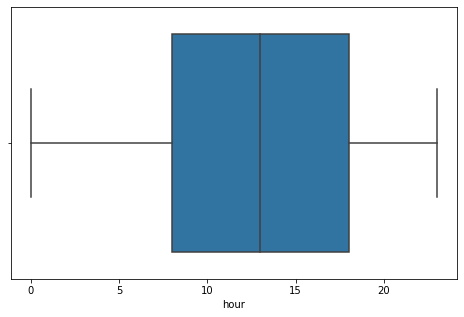

In [12]:
plt.figure(figsize=(8,5))
sns.boxplot('hour',data=train)

<AxesSubplot:xlabel='demand'>

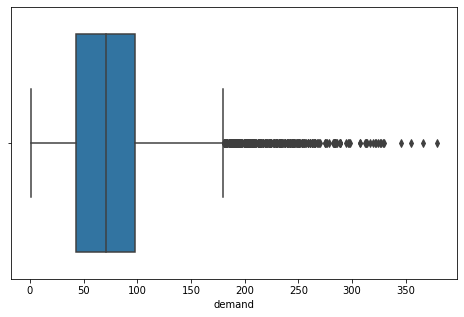

In [13]:
plt.figure(figsize=(8,5))
sns.boxplot('demand',data=train)

### Exploratory Data Analysis

In [14]:
train.head()

,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81


In [15]:
# Labelencoding
le = LabelEncoder()
var_mod = train.select_dtypes(include='object').columns
for i in var_mod:
    train[i] = le.fit_transform(train[i])
    
for i in var_mod:
    test[i] = le.fit_transform(test[i])

In [16]:
# Seperate Features and Target
X= train.drop(columns = ['demand'], axis=1)
y= train['demand']

In [17]:
# 20% data as validation set
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=22)

### ML models

In [18]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [19]:
algos = [LinearRegression(),  Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor()]

names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor']

rmse_list = []

In [20]:
for name in algos:
    model = name
    model.fit(X_train,y_train)
    y_pred = model.predict(X_valid)
    MSE= metrics.mean_squared_error(y_valid,y_pred)
    rmse = np.sqrt(MSE)
    rmse_list.append(rmse)

In [21]:
evaluation = pd.DataFrame({'Model': names,
                           'RMSE': rmse_list})

In [22]:
evaluation

,Model,RMSE
0,Linear Regression,39.745001
1,Ridge Regression,39.745001
2,Lasso Regression,39.747168
3,K Neighbors Regressor,34.342517
4,Decision Tree Regressor,43.739149


In [23]:
submission = pd.read_csv('sample_4E0BhPN.csv')

# Fitting data to choosed ML model
model = KNeighborsRegressor()
model.fit(X, y)
final_predictions = model.predict(test)

submission['demand'] = final_predictions

# only positive predictions for the target variable
submission['demand'] = submission['demand'].apply(lambda x: 0 if x<0 else x)

submission.to_csv('my_submission.csv', index=False)